# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [3]:
#Your code here
df.columns = [col.lower() for col in df.columns]

## Change the Index to be the Line Names

In [4]:
#Your code here
df_linename_index = df.set_index("linename")
df_linename_index.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the index back

In [5]:
# Your code here
df_int_index = df_linename_index.reset_index()
df_int_index.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order
*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [6]:
df['num_lines'] = df['linename'].map(lambda x: len(x))
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,num_lines
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7


In [7]:
# my original strategy:

# num_lines = []
# for linename in df['linename']:
#     num_lines.append(len(linename))
# df['num_lines'] = num_lines
# df.tail()

## Write a function to clean a column name

In [8]:
def clean(col_name):
    cleaned = col_name.lower().replace(' ', '') #Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [9]:
# This is a list comprehension. It applies your clean function to every item in the list.
# We then reassign that to df.columns
# You shouldn't have to change anything here.
# Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [10]:
# Checking the output, we can see the results.
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

## Group the Data by Day of Week and Plot the Sum of The Numeric Columns

,entries,exits,num_lines
day_of_week,,,
0,1114237052454,911938153513,76110
1,1143313287046,942230721477,77303
2,1123655222441,920630864687,75713
3,1122723988662,920691927110,76607
4,1110224700078,906799065337,75573
5,1115661545514,909142081474,74725
6,1192306179082,959223750461,75306


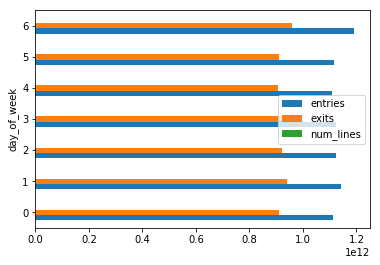

In [11]:
# Your code here  -- 
df['date'] = pd.to_datetime(df['date'])

# from "answer key"
df['day_of_week'] = df['date'].dt.dayofweek

grouped = df.groupby('day_of_week').sum()
grouped.plot(kind='barh')
grouped



## Group the Data by Weekend/Weekday and Plot the Sum of the Numeric Columns

In [ ]:
#Your code here - from learn.co "answers"
grouped = grouped.reset_index()

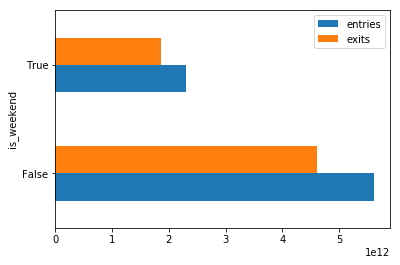

In [14]:
grouped['is_weekend'] = grouped['day_of_week'].map({0:False, 1:False, 2:False,
                                                   3:False, 4:False, 5:True, 
                                                   6:True})
weekend_group = grouped.groupby('is_weekend').sum()
weekend_group[['entries', 'exits']].plot(kind='barh')

## Analysis Question: 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 
# there are three extra days in the non-weekend category. it's not daily average

## Drop a couple of columns

In [15]:
# Your code here
dropped = df.drop(columns=["time", "desc"])
dropped.head()

,c/a,unit,scp,station,linename,division,date,entries,exits,num_lines,day_of_week
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,6736067,2283184,7,5
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,6736087,2283188,7,5
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,6736105,2283229,7,5
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,6736180,2283314,7,5
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,6736349,2283384,7,5


## Summary

Great! You practiced your data cleanup-skills using Pandas.